In [1]:
import re
import nltk
import inflect
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer

In [7]:
file = open("D:/ISDC Work/Python Codes/Experimental/harry potter text mining/data/HPBook1.txt", encoding = "utf8").read()
file

'/ \n\n\n\n\nTHE BOY WHO LIVED \n\nMr. and Mrs. Dursley, of number four, Privet Drive, \nwere proud to say that they were perfectly normal, \nthank you very much. They were the last people you’d \nexpect to be involved in anything strange or \nmysterious, because they just didn’t hold with such \nnonsense. \n\nMr. Dursley was the director of a firm called \nGrunnings, which made drills. He was a big, beefy \nman with hardly any neck, although he did have a \nvery large mustache. Mrs. Dursley was thin and \nblonde and had nearly twice the usual amount of \nneck, which came in very useful as she spent so \nmuch of her time craning over garden fences, spying \non the neighbors. The Dursley s had a small son \ncalled Dudley and in their opinion there was no finer \nboy anywhere. \n\nThe Dursleys had everything they wanted, but they \nalso had a secret, and their greatest fear was that \nsomebody would discover it. They didn’t think they \ncould bear it if anyone found out about the Potters

In [8]:
#nltk.download("punkt")
words = word_tokenize(file)
print(words)

['/', 'THE', 'BOY', 'WHO', 'LIVED', 'Mr.', 'and', 'Mrs.', 'Dursley', ',', 'of', 'number', 'four', ',', 'Privet', 'Drive', ',', 'were', 'proud', 'to', 'say', 'that', 'they', 'were', 'perfectly', 'normal', ',', 'thank', 'you', 'very', 'much', '.', 'They', 'were', 'the', 'last', 'people', 'you', '’', 'd', 'expect', 'to', 'be', 'involved', 'in', 'anything', 'strange', 'or', 'mysterious', ',', 'because', 'they', 'just', 'didn', '’', 't', 'hold', 'with', 'such', 'nonsense', '.', 'Mr.', 'Dursley', 'was', 'the', 'director', 'of', 'a', 'firm', 'called', 'Grunnings', ',', 'which', 'made', 'drills', '.', 'He', 'was', 'a', 'big', ',', 'beefy', 'man', 'with', 'hardly', 'any', 'neck', ',', 'although', 'he', 'did', 'have', 'a', 'very', 'large', 'mustache', '.', 'Mrs.', 'Dursley', 'was', 'thin', 'and', 'blonde', 'and', 'had', 'nearly', 'twice', 'the', 'usual', 'amount', 'of', 'neck', ',', 'which', 'came', 'in', 'very', 'useful', 'as', 'she', 'spent', 'so', 'much', 'of', 'her', 'time', 'craning', 'over

In [9]:
def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def replace_numbers(words):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords.words('english'):
            new_words.append(word)
    return new_words

def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

In [11]:
def normalize(words):
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = replace_numbers(words)
    words = remove_stopwords(words)
    return words

words = normalize(words)
print(words)

['boy', 'lived', 'mr', 'mrs', 'dursley', 'number', 'four', 'privet', 'drive', 'proud', 'say', 'perfectly', 'normal', 'thank', 'much', 'last', 'people', 'expect', 'involved', 'anything', 'strange', 'mysterious', 'hold', 'nonsense', 'mr', 'dursley', 'director', 'firm', 'called', 'grunnings', 'made', 'drills', 'big', 'beefy', 'man', 'hardly', 'neck', 'although', 'large', 'mustache', 'mrs', 'dursley', 'thin', 'blonde', 'nearly', 'twice', 'usual', 'amount', 'neck', 'came', 'useful', 'spent', 'much', 'time', 'craning', 'garden', 'fences', 'spying', 'neighbors', 'dursley', 'small', 'son', 'called', 'dudley', 'opinion', 'finer', 'boy', 'anywhere', 'dursleys', 'everything', 'wanted', 'also', 'secret', 'greatest', 'fear', 'somebody', 'would', 'discover', 'think', 'could', 'bear', 'anyone', 'found', 'potters', 'mrs', 'potter', 'mrs', 'dursley', 'sister', 'page', 'two', 'harry', 'potter', 'philosophers', 'stone', 'jk', 'rowling', 'met', 'several', 'years', 'fact', 'mrs', 'dursley', 'pretended', 's

In [10]:
def stem_and_lemmatize(words):
    stems = stem_words(words)
    lemmas = lemmatize_verbs(words)
    return stems, lemmas

stems, lemmas = stem_and_lemmatize(words)
print('Stemmed:\n', stems)
print('\nLemmatized:\n', lemmas)

Stemmed:
 ['/', 'the', 'boy', 'who', 'liv', 'mr.', 'and', 'mrs.', 'dursley', ',', 'of', 'numb', 'four', ',', 'privet', 'driv', ',', 'wer', 'proud', 'to', 'say', 'that', 'they', 'wer', 'perfect', 'norm', ',', 'thank', 'you', 'very', 'much', '.', 'they', 'wer', 'the', 'last', 'peopl', 'you', '’', 'd', 'expect', 'to', 'be', 'involv', 'in', 'anyth', 'strange', 'or', 'mystery', ',', 'becaus', 'they', 'just', 'didn', '’', 't', 'hold', 'with', 'such', 'nonsens', '.', 'mr.', 'dursley', 'was', 'the', 'direct', 'of', 'a', 'firm', 'cal', 'grun', ',', 'which', 'mad', 'dril', '.', 'he', 'was', 'a', 'big', ',', 'beefy', 'man', 'with', 'hard', 'any', 'neck', ',', 'although', 'he', 'did', 'hav', 'a', 'very', 'larg', 'mustach', '.', 'mrs.', 'dursley', 'was', 'thin', 'and', 'blond', 'and', 'had', 'near', 'twic', 'the', 'us', 'amount', 'of', 'neck', ',', 'which', 'cam', 'in', 'very', 'us', 'as', 'she', 'spent', 'so', 'much', 'of', 'her', 'tim', 'cran', 'ov', 'gard', 'fent', ',', 'spy', 'on', 'the', 'neig

In [13]:
tagged = nltk.pos_tag(words)
tagged

[('boy', 'NN'),
 ('lived', 'VBD'),
 ('mr', 'JJ'),
 ('mrs', 'NN'),
 ('dursley', 'NN'),
 ('number', 'NN'),
 ('four', 'CD'),
 ('privet', 'NN'),
 ('drive', 'NN'),
 ('proud', 'NNS'),
 ('say', 'VBP'),
 ('perfectly', 'RB'),
 ('normal', 'JJ'),
 ('thank', 'NN'),
 ('much', 'JJ'),
 ('last', 'JJ'),
 ('people', 'NNS'),
 ('expect', 'VBP'),
 ('involved', 'VBN'),
 ('anything', 'NN'),
 ('strange', 'JJ'),
 ('mysterious', 'JJ'),
 ('hold', 'NN'),
 ('nonsense', 'NN'),
 ('mr', 'NN'),
 ('dursley', 'NN'),
 ('director', 'NN'),
 ('firm', 'NN'),
 ('called', 'VBD'),
 ('grunnings', 'NNS'),
 ('made', 'VBN'),
 ('drills', 'NNS'),
 ('big', 'JJ'),
 ('beefy', 'NN'),
 ('man', 'NN'),
 ('hardly', 'RB'),
 ('neck', 'CC'),
 ('although', 'IN'),
 ('large', 'JJ'),
 ('mustache', 'NN'),
 ('mrs', 'NN'),
 ('dursley', 'NN'),
 ('thin', 'JJ'),
 ('blonde', 'NN'),
 ('nearly', 'RB'),
 ('twice', 'RB'),
 ('usual', 'JJ'),
 ('amount', 'NN'),
 ('neck', 'NN'),
 ('came', 'VBD'),
 ('useful', 'JJ'),
 ('spent', 'NN'),
 ('much', 'JJ'),
 ('time', 'NN

In [9]:
nltk.help.upenn_tagset("NNS")

NNS: noun, common, plural
    undergraduates scotches bric-a-brac products bodyguards facets coasts
    divestitures storehouses designs clubs fragrances averages
    subjectivists apprehensions muses factory-jobs ...


In [10]:
nltk.help.upenn_tagset("JJ")

JJ: adjective or numeral, ordinal
    third ill-mannered pre-war regrettable oiled calamitous first separable
    ectoplasmic battery-powered participatory fourth still-to-be-named
    multilingual multi-disciplinary ...


In [15]:
grammar = ('''
    NP: {<DT>?<JJ>*<NN>} # NP
    ''')

In [16]:
chunkParser = nltk.RegexpParser(grammar)
tree = chunkParser.parse(tagged)
for subtree in tree.subtrees():
    print(subtree)

(S
  (NP boy/NN)
  lived/VBD
  (NP mr/JJ mrs/NN)
  (NP dursley/NN)
  (NP number/NN)
  four/CD
  (NP privet/NN)
  (NP drive/NN)
  proud/NNS
  say/VBP
  perfectly/RB
  (NP normal/JJ thank/NN)
  much/JJ
  last/JJ
  people/NNS
  expect/VBP
  involved/VBN
  (NP anything/NN)
  (NP strange/JJ mysterious/JJ hold/NN)
  (NP nonsense/NN)
  (NP mr/NN)
  (NP dursley/NN)
  (NP director/NN)
  (NP firm/NN)
  called/VBD
  grunnings/NNS
  made/VBN
  drills/NNS
  (NP big/JJ beefy/NN)
  (NP man/NN)
  hardly/RB
  neck/CC
  although/IN
  (NP large/JJ mustache/NN)
  (NP mrs/NN)
  (NP dursley/NN)
  (NP thin/JJ blonde/NN)
  nearly/RB
  twice/RB
  (NP usual/JJ amount/NN)
  (NP neck/NN)
  came/VBD
  (NP useful/JJ spent/NN)
  (NP much/JJ time/NN)
  craning/VBG
  (NP garden/NN)
  fences/NNS
  spying/VBG
  neighbors/NNS
  dursley/VBP
  (NP small/JJ son/NN)
  called/VBN
  (NP dudley/JJ opinion/NN)
  (NP finer/NN)
  (NP boy/NN)
  anywhere/RB
  dursleys/VBZ
  (NP everything/NN)
  wanted/VBD
  also/RB
  secret/JJ
  gre

(NP anything/NN)
(NP uncle/NN)
(NP vernon/NN)
(NP large/JJ purple/JJ face/NN)
(NP boy/JJ funny/JJ business/NN)
(NP anything/NN)
(NP cupboard/JJ christmas/NN)
(NP anything/NN)
(NP twenty-six/JJ harry/NN)
(NP potter/NN)
(NP jk/NN)
(NP uncle/JJ vernon/NN)
(NP problem/NN)
(NP happen/JJ aunt/NN)
(NP petunia/NN)
(NP harry/NN)
(NP pair/NN)
(NP kitchen/NN)
(NP hair/NN)
(NP hide/JJ horrible/JJ scar/NN)
(NP dudley/NN)
(NP harry/JJ spent/NN)
(NP sleepless/NN)
(NP night/NN)
(NP school/NN)
(NP next/JJ day/NN)
(NP morning/NN)
(NP hair/NN)
(NP petunia/NN)
(NP week/NN)
(NP cupboard/NN)
(NP tried/JJ explain/NN)
(NP another/DT time/NN)
(NP aunt/NN)
(NP petunia/NN)
(NP force/NN)
(NP old/JJ sweater/NN)
(NP dudley/NN)
(NP orange/NN)
(NP puff/NN)
(NP tried/JJ pull/JJ head/NN)
(NP hand/NN)
(NP puppet/NN)
(NP fit/JJ harry/NN)
(NP aunt/NN)
(NP petunia/NN)
(NP wash/JJ great/JJ relief/NN)
(NP harry/NN)
(NP hand/NN)
(NP terrible/JJ trouble/NN)
(NP roof/JJ school/NN)
(NP gang/NN)
(NP usual/JJ much/JJ harry/NN)
(NP

(NP school/NN)
(NP home/NN)
(NP cupboard/NN)
(NP noise/NN)
(NP aunt/NN)
(NP petunia/NN)
(NP door/NN)
(NP harry/NN)
(NP heart/NN)
(NP sinking/NN)
(NP good/JJ dream/NN)
(NP tap/NN)
(NP tap/NN)
(NP tap/NN)
(NP right/NN)
(NP harry/NN)
(NP sat/JJ hagrid/JJ heavy/JJ coat/NN)
(NP full/JJ sunlight/NN)
(NP storm/NN)
(NP hagrid/JJ asleep/NN)
(NP sofa/JJ page/NN)
(NP sixty-eight/JJ harry/NN)
(NP potter/NN)
(NP jk/NN)
(NP claw/NN)
(NP window/NN)
(NP newspaper/NN)
(NP beak/JJ harry/NN)
(NP large/JJ balloon/NN)
(NP straight/JJ window/NN)
(NP open/JJ owl/NN)
(NP newspaper/NN)
(NP top/NN)
(NP hagrid/NN)
(NP owl/NN)
(NP floor/NN)
(NP attack/JJ hagrid/JJ coat/NN)
(NP harry/NN)
(NP wave/JJ owl/JJ way/NN)
(NP coat/NN)
(NP hagrid/NN)
(NP harry/NN)
(NP owl/JJ pay/NN)
(NP hagrid/NN)
(NP sofa/NN)
(NP payin/JJ fer/NN)
(NP deliverin/JJ paper/NN)
(NP look/NN)
(NP coat/NN)
(NP nothing/NN)
(NP peppermint/NN)
(NP handful/JJ strangelooking/NN)
(NP harry/NN)
(NP little/JJ bronze/NN)
(NP leg/NN)
(NP harry/NN)
(NP mone

(NP robe/NN)
(NP shop/NN)
(NP harry/NN)
(NP lot/NN)
(NP interest/NN)
(NP diagon/JJ alley/NN)
(NP train/NN)
(NP harry/NN)
(NP potter/NN)
(NP compartment/NN)
(NP harry/NN)
(NP side/JJ pale/NN)
(NP boy/NN)
(NP crabbe/JJ goyle/NN)
(NP pale/JJ boy/NN)
(NP harry/NN)
(NP malfoy/JJ draco/NN)
(NP malfoy/NN)
(NP ron/NN)
(NP slight/JJ cough/NN)
(NP draco/NN)
(NP malfoy/NN)
(NP name/NN)
(NP funny/JJ need/NN)
(NP ask/NN)
(NP father/NN)
(NP red/JJ hair/NN)
(NP afford/NN)
(NP wrong/JJ sort/NN)
(NP help/NN)
(NP one hundred and twenty-one/JJ harry/NN)
(NP potter/NN)
(NP jk/NN)
(NP hand/NN)
(NP shake/NN)
(NP harry/NN)
(NP think/NN)
(NP tell/NN)
(NP wrong/JJ sort/NN)
(NP draco/JJ malfoy/NN)
(NP red/JJ pink/NN)
(NP tinge/NN)
(NP pale/JJ cheeks/NN)
(NP careful/JJ potter/NN)
(NP bit/NN)
(NP politer/NN)
(NP way/NN)
(NP rub/NN)
(NP harry/NN)
(NP ron/NN)
(NP ron/NN)
(NP face/NN)
(NP red/JJ hair/NN)
(NP get/NN)
(NP crabbe/JJ goyle/NN)
(NP lot/NN)
(NP ron/NN)
(NP feel/NN)
(NP food/NN)
(NP chocolate/NN)
(NP ron/N

(NP white/JJ face/NN)
(NP look/NN)
(NP ground/NN)
(NP gasp/JJ slip/NN)
(NP wham/JJ thud/NN)
(NP nasty/JJ crack/NN)
(NP facedown/JJ grass/NN)
(NP heap/NN)
(NP broomstick/NN)
(NP forbidden/JJ forest/NN)
(NP sight/NN)
(NP madam/NN)
(NP hooch/NN)
(NP neville/JJ face/NN)
(NP white/JJ broken/JJ wrist/NN)
(NP harry/NN)
(NP right/JJ get/NN)
(NP rest/JJ class/NN)
(NP none/NN)
(NP move/NN)
(NP boy/JJ hospital/NN)
(NP dear/JJ neville/JJ face/NN)
(NP wrist/NN)
(NP madam/JJ hooch/NN)
(NP arm/NN)
(NP page/NN)
(NP one hundred and sixty-four/JJ harry/NN)
(NP potter/NN)
(NP jk/NN)
(NP earshot/JJ malfoy/NN)
(NP burst/NN)
(NP laughter/NN)
(NP face/NN)
(NP great/JJ lump/NN)
(NP shut/JJ malfoy/NN)
(NP longbottom/NN)
(NP pansy/JJ parkinson/NN)
(NP slytherin/JJ girl/NN)
(NP look/NN)
(NP something/NN)
(NP grass/NN)
(NP stupid/JJ thing/NN)
(NP longbottom/NN)
(NP gran/NN)
(NP remembrall/NN)
(NP give/JJ malfoy/NN)
(NP harry/NN)
(NP everyone/NN)
(NP watch/NN)
(NP malfoy/NN)
(NP harry/NN)
(NP malfoy/NN)
(NP leapt/

(NP nice/JJ dive/NN)
(NP flint/JJ field/NN)
(NP head/NN)
(NP bludger/NN)
(NP quaffle/NN)
(NP adrian/JJ pucey/NN)
(NP goal/NN)
(NP second/JJ bludger/NN)
(NP way/NN)
(NP george/NN)
(NP weasley/NN)
(NP tell/NN)
(NP nice/JJ play/NN)
(NP gryffindor/NN)
(NP beater/NN)
(NP possession/NN)
(NP quaffle/NN)
(NP clear/JJ field/NN)
(NP bludger/NN)
(NP goal/NN)
(NP bletchley/NN)
(NP cold/JJ air/NN)
(NP move/NN)
(NP hagrid/JJ ron/NN)
(NP hermione/NN)
(NP give/JJ hagrid/NN)
(NP enough/JJ space/NN)
(NP join/NN)
(NP bin/NN)
(NP watchin/JJ hut/NN)
(NP large/JJ pair/NN)
(NP neck/NN)
(NP bein/NN)
(NP sign/NN)
(NP snitch/NN)
(NP eh/JJ nope/NN)
(NP ron/NN)
(NP harry/NN)
(NP outta/NN)
(NP trouble/NN)
(NP somethin/NN)
(NP speck/NN)
(NP harry/NN)
(NP page/NN)
(NP two hundred and nine/NN)
(NP harry/NN)
(NP potter/NN)
(NP jk/NN)
(NP way/NN)
(NP harry/NN)
(NP game/NN)
(NP sign/NN)
(NP part/NN)
(NP wood/NN)
(NP game/NN)
(NP plan/NN)
(NP way/NN)
(NP catch/NN)
(NP snitch/NN)
(NP wood/NN)
(NP harry/NN)
(NP couple/NN)


(NP clean/JJ game/NN)
(NP snape/NN)
(NP harry/NN)
(NP another/DT reason/NN)
(NP snape/NN)
(NP quidditch/NN)
(NP rest/NN)
(NP team/NN)
(NP talk/NN)
(NP another/DT usual/JJ end/NN)
(NP practice/NN)
(NP harry/NN)
(NP gryffindor/JJ common/JJ room/NN)
(NP ron/NN)
(NP hermione/NN)
(NP chess/JJ chess/JJ thing/NN)
(NP hermione/NN)
(NP something/NN)
(NP harry/NN)
(NP ron/NN)
(NP good/JJ talk/NN)
(NP moment/NN)
(NP ron/NN)
(NP harry/NN)
(NP next/JJ need/NN)
(NP concern/NN)
(NP sight/NN)
(NP harry/NN)
(NP matter/NN)
(NP look/NN)
(NP snape/NN)
(NP sudden/JJ sinister/NN)
(NP desire/NN)
(NP quidditch/NN)
(NP play/NN)
(NP ill/NN)
(NP ron/JJ pretend/NN)
(NP break/NN)
(NP leg/NN)
(NP hermione/NN)
(NP break/JJ leg/NN)
(NP ron/NN)
(NP harry/JJ reserve/NN)
(NP seeker/NN)
(NP gryffindor/JJ play/NN)
(NP page/NN)
(NP two hundred and forty-three/JJ harry/NN)
(NP potter/NN)
(NP jk/NN)
(NP moment/NN)
(NP neville/NN)
(NP common/JJ room/NN)
(NP climb/JJ portrait/NN)
(NP hole/NN)
(NP anyone/NN)
(NP guess/NN)
(NP l

(NP realize/NN)
(NP firenze/JJ potter/NN)
(NP boy/NN)
(NP quicker/NN)
(NP bane/NN)
(NP set/NN)
(NP ground/NN)
(NP sure/JJ firenze/JJ thought/NN)
(NP gloomy/JJ voice/NN)
(NP bane/NN)
(NP legs/JJ anger/NN)
(NP concerned/JJ foretold/NN)
(NP business/NN)
(NP firenze/NN)
(NP hind/JJ legs/JJ anger/NN)
(NP harry/NN)
(NP grab/NN)
(NP unicorn/JJ firenze/NN)
(NP bane/JJ understand/NN)
(NP bane/NN)
(NP two hundred and eighty-nine/JJ harry/NN)
(NP potter/NN)
(NP jk/NN)
(NP firenze/NN)
(NP harry/NN)
(NP ronan/NN)
(NP bane/NN)
(NP harry/NN)
(NP clue/NN)
(NP bane/NN)
(NP thing/NN)
(NP walk/NN)
(NP harry/JJ keep/JJ head/NN)
(NP case/NN)
(NP harry/JJ question/NN)
(NP way/NN)
(NP long/JJ harry/NN)
(NP want/JJ talk/NN)
(NP dense/JJ patch/NN)
(NP unicorn/JJ blood/NN)
(NP harry/NN)
(NP odd/JJ question/NN)
(NP horn/JJ tail/NN)
(NP hair/NN)
(NP monstrous/JJ thing/NN)
(NP slay/NN)
(NP unicorn/NN)
(NP nothing/NN)
(NP everything/NN)
(NP gain/NN)
(NP crime/NN)
(NP blood/NN)
(NP inch/JJ death/NN)
(NP terrible/JJ 

In [ ]:
tree.draw()

In [11]:
import textblob

In [12]:
fdist = nltk.FreqDist(words)
fdist

FreqDist({'harry': 1672, 'said': 794, 'potter': 445, 'ron': 429, 'stone': 427, 'hagrid': 370, 'page': 349, 'philosophers': 347, 'jk': 347, 'rowling': 347, ...})

In [13]:
for word, frequency in fdist.most_common(50):
    print(u'{};{}'.format(word, frequency))

harry;1672
said;794
potter;445
ron;429
stone;427
hagrid;370
page;349
philosophers;347
jk;347
rowling;347
hermione;269
one;265
back;260
got;206
could;198
get;195
like;192
know;189
see;180
professor;179
snape;171
looked;169
dumbledore;160
around;142
dudley;140
going;135
go;135
something;132
look;129
malfoy;128
never;126
right;125
think;123
uncle;122
yeh;121
time;119
well;117
neville;117
vernon;116
quirrell;113
first;111
would;108
door;106
even;105
eyes;105
two;102
looking;100
mcgonagall;100
head;99
people;96


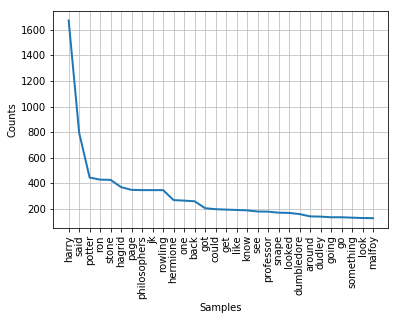

In [15]:
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

In [16]:
import yellowbrick
from yellowbrick.text import FreqDistVisualizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

frozenset({'get', 'seeming', 'together', 'upon', 'several', 'both', 'behind', 'besides', 'becoming', 'often', 'anyway', 'there', 'while', 'mine', 'any', 'along', 'myself', 'we', 'toward', 'nevertheless', 'per', 'towards', 'latterly', 'may', 'after', 'himself', 'un', 'give', 'her', 'them', 'she', 'during', 'wherein', 'be', 'put', 'the', 'anyone', 'most', 'it', 'ours', 'in', 'as', 'onto', 'eleven', 'indeed', 'since', 'throughout', 'those', 'side', 'two', 'might', 'five', 'thereafter', 'yours', 'its', 'if', 'afterwards', 'thereby', 'themselves', 'go', 'nine', 'your', 'down', 'before', 'one', 'am', 'over', 'to', 'move', 'less', 'seemed', 'everywhere', 'twenty', 'hundred', 'eg', 'name', 'never', 'own', 'what', 'someone', 'otherwise', 'eight', 'when', 'him', 'herein', 'http', 'cry', 'my', 'somehow', 'few', 'at', 'fill', 'nothing', 'thick', 'etc', 'here', 'between', 'thus', 'next', 'full', 'though', 'see', 'thereupon', 'seems', 're', 'beyond', 'wherever', 'interest', 'off', 'against', 'us', '

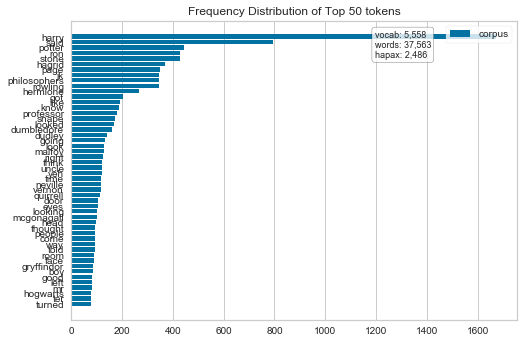

In [20]:
from sklearn.feature_extraction import text 

stop_words2 = text.ENGLISH_STOP_WORDS.union(['http', 'https'])
print(stop_words2)

vectorizer = CountVectorizer(stop_words=stop_words2)
docs = vectorizer.fit_transform(words)
features = vectorizer.get_feature_names()
visualizer = FreqDistVisualizer(features=features)
visualizer.fit(docs)
qvisualizer.poof()

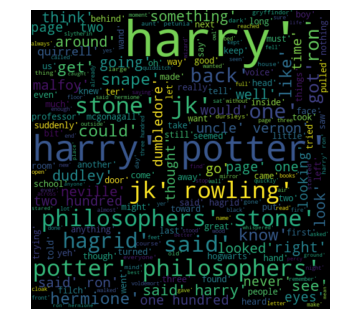

In [30]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(width=480, height=480, margin=0).generate(str(words))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [ ]:
import re
freq = {}
match_pat = re.findall(r'Harry', file)
for w in match_pat:
    count = freq.get(w, 0)
    freq[w] = count + 1
freq_ls = freq.keys()
for words in freq_ls:
    print(words, freq[w])

In [ ]:
#pip install nltk
import nltk
nltk.download()

Corpus - Body of text, singular. Corpora is the plural of this. Example: A collection of medical journals.


Lexicon - Words and their meanings. Example: English dictionary. Consider, however, that various fields will have different lexicons. For example: To a financial investor, the first meaning for the word "Bull" is someone who is confident about the market, as compared to the common English lexicon, where the first meaning for the word "Bull" is an animal. As such, there is a special lexicon for financial investors, doctors, children, mechanics, and so on.


Token - Each "entity" that is a part of whatever was split up based on rules. For examples, each word is a token when a sentence is "tokenized" into words. Each sentence can also be a token, if you tokenized the sentences out of a paragraph.


In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize

EXAMPLE_TEXT = "Hello Mr. Smith, how are you doing today? The weather is great, and Python is awesome. The sky is pinkish-blue. You shouldn't eat cardboard."

print(sent_tokenize(EXAMPLE_TEXT))

In [ ]:
print(word_tokenize(EXAMPLE_TEXT))

In [ ]:
for i in word_tokenize(EXAMPLE_TEXT):
    print(i)

In [ ]:
from nltk.corpus import stopwords
set(stopwords.words('english'))

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

example_sent = "This is a sample sentence, showing off the stop words filtration."

stop_words = set(stopwords.words('english'))

word_tokens = word_tokenize(example_sent)

#filtered_sentence = [w for w in word_tokens if not w in stop_words]

filtered_sentence = []

for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)
        
print(word_tokens)
print(filtered_sentence)

The idea of stemming is a sort of normalizing method. Many variations of words carry the same meaning, other than when tense is involved.

In [ ]:
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

ps = PorterStemmer()

In [ ]:
example_words = ["python","pythoner","pythoning","pythoned","pythonly"]

In [ ]:
for w in example_words:
    print(ps.stem(w))

In [ ]:
new_text = "It is important to by very pythonly while you are pythoning with python. All pythoners have pythoned poorly at least once."

In [ ]:
words = word_tokenize(new_text)

for w in words:
    print(ps.stem(w))

One of the more powerful aspects of the NLTK module is the Part of Speech tagging that it can do for you. This means labeling words in a sentence as nouns, adjectives, verbs...etc. Even more impressive, it also labels by tense, and more. 

POS tag list: (search online for python POS taglist)


In [ ]:
import nltk
from nltk.corpus import state_union
from nltk.tokenize import PunktSentenceTokenizer

In [9]:
train_text = state_union.raw("2005-GWBush.txt")
sample_text = state_union.raw("2006-GWBush.txt")

In [10]:
custom_sent_tokenizer = PunktSentenceTokenizer(train_text)
tokenized = custom_sent_tokenizer.tokenize(sample_text)

In [11]:
def process_content():
    try:
        for i in tokenized[:5]:
            words = nltk.word_tokenize(i)
            tagged = nltk.pos_tag(words)
            print(tagged)

    except Exception as e:
        print(str(e))


process_content()

[('PRESIDENT', 'NNP'), ('GEORGE', 'NNP'), ('W.', 'NNP'), ('BUSH', 'NNP'), ("'S", 'POS'), ('ADDRESS', 'NNP'), ('BEFORE', 'IN'), ('A', 'NNP'), ('JOINT', 'NNP'), ('SESSION', 'NNP'), ('OF', 'IN'), ('THE', 'NNP'), ('CONGRESS', 'NNP'), ('ON', 'NNP'), ('THE', 'NNP'), ('STATE', 'NNP'), ('OF', 'IN'), ('THE', 'NNP'), ('UNION', 'NNP'), ('January', 'NNP'), ('31', 'CD'), (',', ','), ('2006', 'CD'), ('THE', 'NNP'), ('PRESIDENT', 'NNP'), (':', ':'), ('Thank', 'NNP'), ('you', 'PRP'), ('all', 'DT'), ('.', '.')]
[('Mr.', 'NNP'), ('Speaker', 'NNP'), (',', ','), ('Vice', 'NNP'), ('President', 'NNP'), ('Cheney', 'NNP'), (',', ','), ('members', 'NNS'), ('of', 'IN'), ('Congress', 'NNP'), (',', ','), ('members', 'NNS'), ('of', 'IN'), ('the', 'DT'), ('Supreme', 'NNP'), ('Court', 'NNP'), ('and', 'CC'), ('diplomatic', 'JJ'), ('corps', 'NN'), (',', ','), ('distinguished', 'JJ'), ('guests', 'NNS'), (',', ','), ('and', 'CC'), ('fellow', 'JJ'), ('citizens', 'NNS'), (':', ':'), ('Today', 'VB'), ('our', 'PRP$'), ('nat

Now that we know the parts of speech, we can do what is called chunking, and group words into hopefully meaningful chunks. One of the main goals of chunking is to group into what are known as "noun phrases." These are phrases of one or more words that contain a noun, maybe some descriptive words, maybe a verb, and maybe something like an adverb. The idea is to group nouns with the words that are in relation to them.

In [ ]:
train_text = state_union.raw("2005-GWBush.txt")
sample_text = state_union.raw("2006-GWBush.txt")

custom_sent_tokenizer = PunktSentenceTokenizer(train_text)

tokenized = custom_sent_tokenizer.tokenize(sample_text)

def process_content():
    try:
        for i in tokenized:
            words = nltk.word_tokenize(i)
            tagged = nltk.pos_tag(words)

            chunkGram = r"""Chunk: {<RB.?>*<VB.?>*<NNP>+<NN>?}"""

            chunkParser = nltk.RegexpParser(chunkGram)
            chunked = chunkParser.parse(tagged)

            chunked.draw()     

    except Exception as e:
        print(str(e))


process_content()

The main line here in question is:

chunkGram = r"""Chunk: {<RB.?>*<VB.?>*<NNP>+<NN>?}"""

This line, broken down:

<RB.?>* = "0 or more of any tense of adverb," followed by:

<VB.?>* = "0 or more of any tense of verb," followed by:

<NNP>+ = "One or more proper nouns," followed by

<NN>? = "zero or one singular noun."


Chinking is a lot like chunking, it is basically a way for you to remove a chunk from a chunk. The chunk that you remove from your chunk is your chink.

In [ ]:
train_text = state_union.raw("2005-GWBush.txt")
sample_text = state_union.raw("2006-GWBush.txt")

custom_sent_tokenizer = PunktSentenceTokenizer(train_text)

tokenized = custom_sent_tokenizer.tokenize(sample_text)

def process_content():
    try:
        for i in tokenized[5:]:
            words = nltk.word_tokenize(i)
            tagged = nltk.pos_tag(words)

            chunkGram = r"""Chunk: {<.*>+}
                                    }<VB.?|IN|DT|TO>+{"""

            chunkParser = nltk.RegexpParser(chunkGram)
            chunked = chunkParser.parse(tagged)

            chunked.draw()


    except Exception as e:
        print(str(e))


process_content()

One of the most major forms of chunking in natural language processing is called "Named Entity Recognition." The idea is to have the machine immediately be able to pull out "entities" like people, places, things, locations, monetary figures, and more.

This can be a bit of a challenge, but NLTK is this built in for us. There are two major options with NLTK's named entity recognition: either recognize all named entities, or recognize named entities as their respective type, like people, places, locations, etc.

In [ ]:
train_text = state_union.raw("2005-GWBush.txt")
sample_text = state_union.raw("2006-GWBush.txt")

custom_sent_tokenizer = PunktSentenceTokenizer(train_text)

tokenized = custom_sent_tokenizer.tokenize(sample_text)

def process_content():
    try:
        for i in tokenized[5:]:
            words = nltk.word_tokenize(i)
            tagged = nltk.pos_tag(words)
            namedEnt = nltk.ne_chunk(tagged, binary=True)
            namedEnt.draw()
    except Exception as e:
        print(str(e))


process_content()

A very similar operation to stemming is called lemmatizing. The major difference between these is, as you saw earlier, stemming can often create non-existent words, whereas lemmas are actual words.

So, your root stem, meaning the word you end up with, is not something you can just look up in a dictionary, but you can look up a lemma.

In [ ]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

print(lemmatizer.lemmatize("cats"))
print(lemmatizer.lemmatize("cacti"))
print(lemmatizer.lemmatize("geese"))
print(lemmatizer.lemmatize("rocks"))
print(lemmatizer.lemmatize("python"))
print(lemmatizer.lemmatize("better", pos="a"))
print(lemmatizer.lemmatize("best", pos="a"))
print(lemmatizer.lemmatize("run"))
print(lemmatizer.lemmatize("run",'v'))

In [ ]:
import nltk
import random
from nltk.corpus import movie_reviews

documents = [(list(movie_reviews.words(fileid)), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]

random.shuffle(documents)

print(documents[1])

all_words = []
for w in movie_reviews.words():
    all_words.append(w.lower())

all_words = nltk.FreqDist(all_words)
print(all_words.most_common(15))
print(all_words["stupid"])



In [ ]:
import nltk
import random
from nltk.corpus import movie_reviews

documents = [(list(movie_reviews.words(fileid)), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]

random.shuffle(documents)

all_words = []

for w in movie_reviews.words():
    all_words.append(w.lower())

all_words = nltk.FreqDist(all_words)

word_features = list(all_words.keys())[:3000]

def find_features(document):
    words = set(document)
    features = {}
    for w in word_features:
        features[w] = (w in words)

    return features

print((find_features(movie_reviews.words('neg/cv000_29416.txt'))))

featuresets = [(find_features(rev), category) for (rev, category) in documents]

In [ ]:
import nltk
import random
from nltk.corpus import movie_reviews

documents = [(list(movie_reviews.words(fileid)), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]

random.shuffle(documents)

all_words = []

for w in movie_reviews.words():
    all_words.append(w.lower())

all_words = nltk.FreqDist(all_words)

word_features = list(all_words.keys())[:3000]

def find_features(document):
    words = set(document)
    features = {}
    for w in word_features:
        features[w] = (w in words)

    return features

#print((find_features(movie_reviews.words('neg/cv000_29416.txt'))))

featuresets = [(find_features(rev), category) for (rev, category) in documents]
        
training_set = featuresets[:1900]
testing_set =  featuresets[1900:]

classifier = nltk.NaiveBayesClassifier.train(training_set)
print("Naive Bayes Algo accuracy percent:", (nltk.classify.accuracy(classifier, testing_set))*100)
classifier.show_most_informative_features(15)
